Median House Value Prediction in California using Ensemble Learning: A Random Forest Regression Approach.

#### Median House Value Prediction in California using Ensemble Learning: Random Forest Regression vs XGBoost regression Approach.       

The median California house price prediction problem has been a subject of extensive supervised machine learning research. 
Public domain literature consistently indicates that ensemble methods, specifically Random Forest (RF) and Extreme Gradient 
Boosting (XGBoost), establish the current performance benchmark. This project is an effort to surpass results of existing models 
by optimizing the predictive capacity of these models through advanced data preprocessing, feature engineering and hyperparameter optimization..

In [176]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import missingno as mno

In [99]:
# Load the California Housing dataset.
df = pd.read_csv("C:\\Users\\pmcan\\Downloads\\housing.csv.zip")

In [101]:
# View the first five rows of the California Housing Prices dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


####### INITIAL DATA EXPLORATION

In [103]:
# Concise summary of the California Housing dataset, including the index data type, column data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [105]:
# Quick statistical summary of the numerical columns in the DataFrame.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


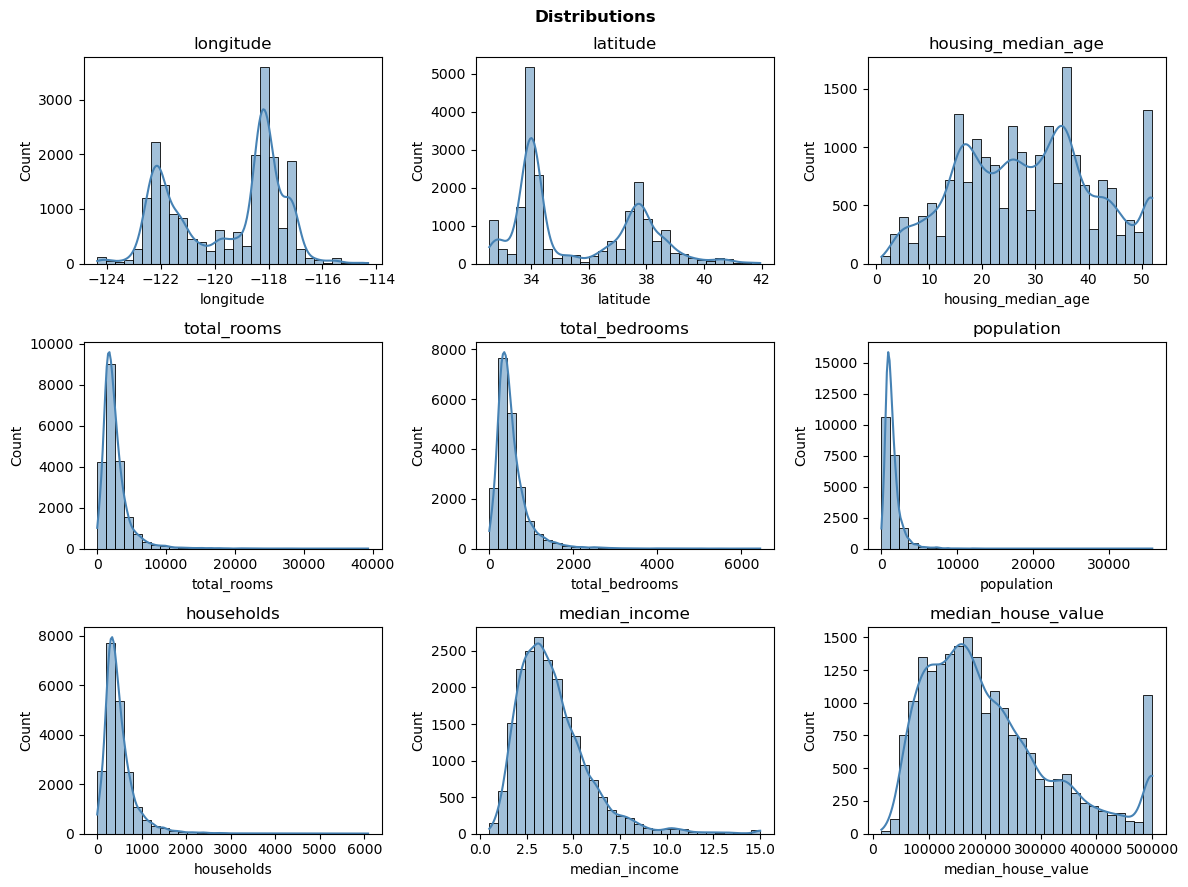

In [58]:
# Overview of the data distribution

columns = ["longitude", "latitude", "housing_median_age", "total_rooms",
           "total_bedrooms", "population", "households", "median_income",
           "median_house_value"]

fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(12,9))
plt.suptitle("Distributions", fontweight="bold")

for i,col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row,col_idx]
    sns.histplot(data=df, x=col, ax=ax, kde=True, bins=30, color="steelblue")
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [107]:
# Count missing values per column
# From the result, total_bedrooms is the only column with missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

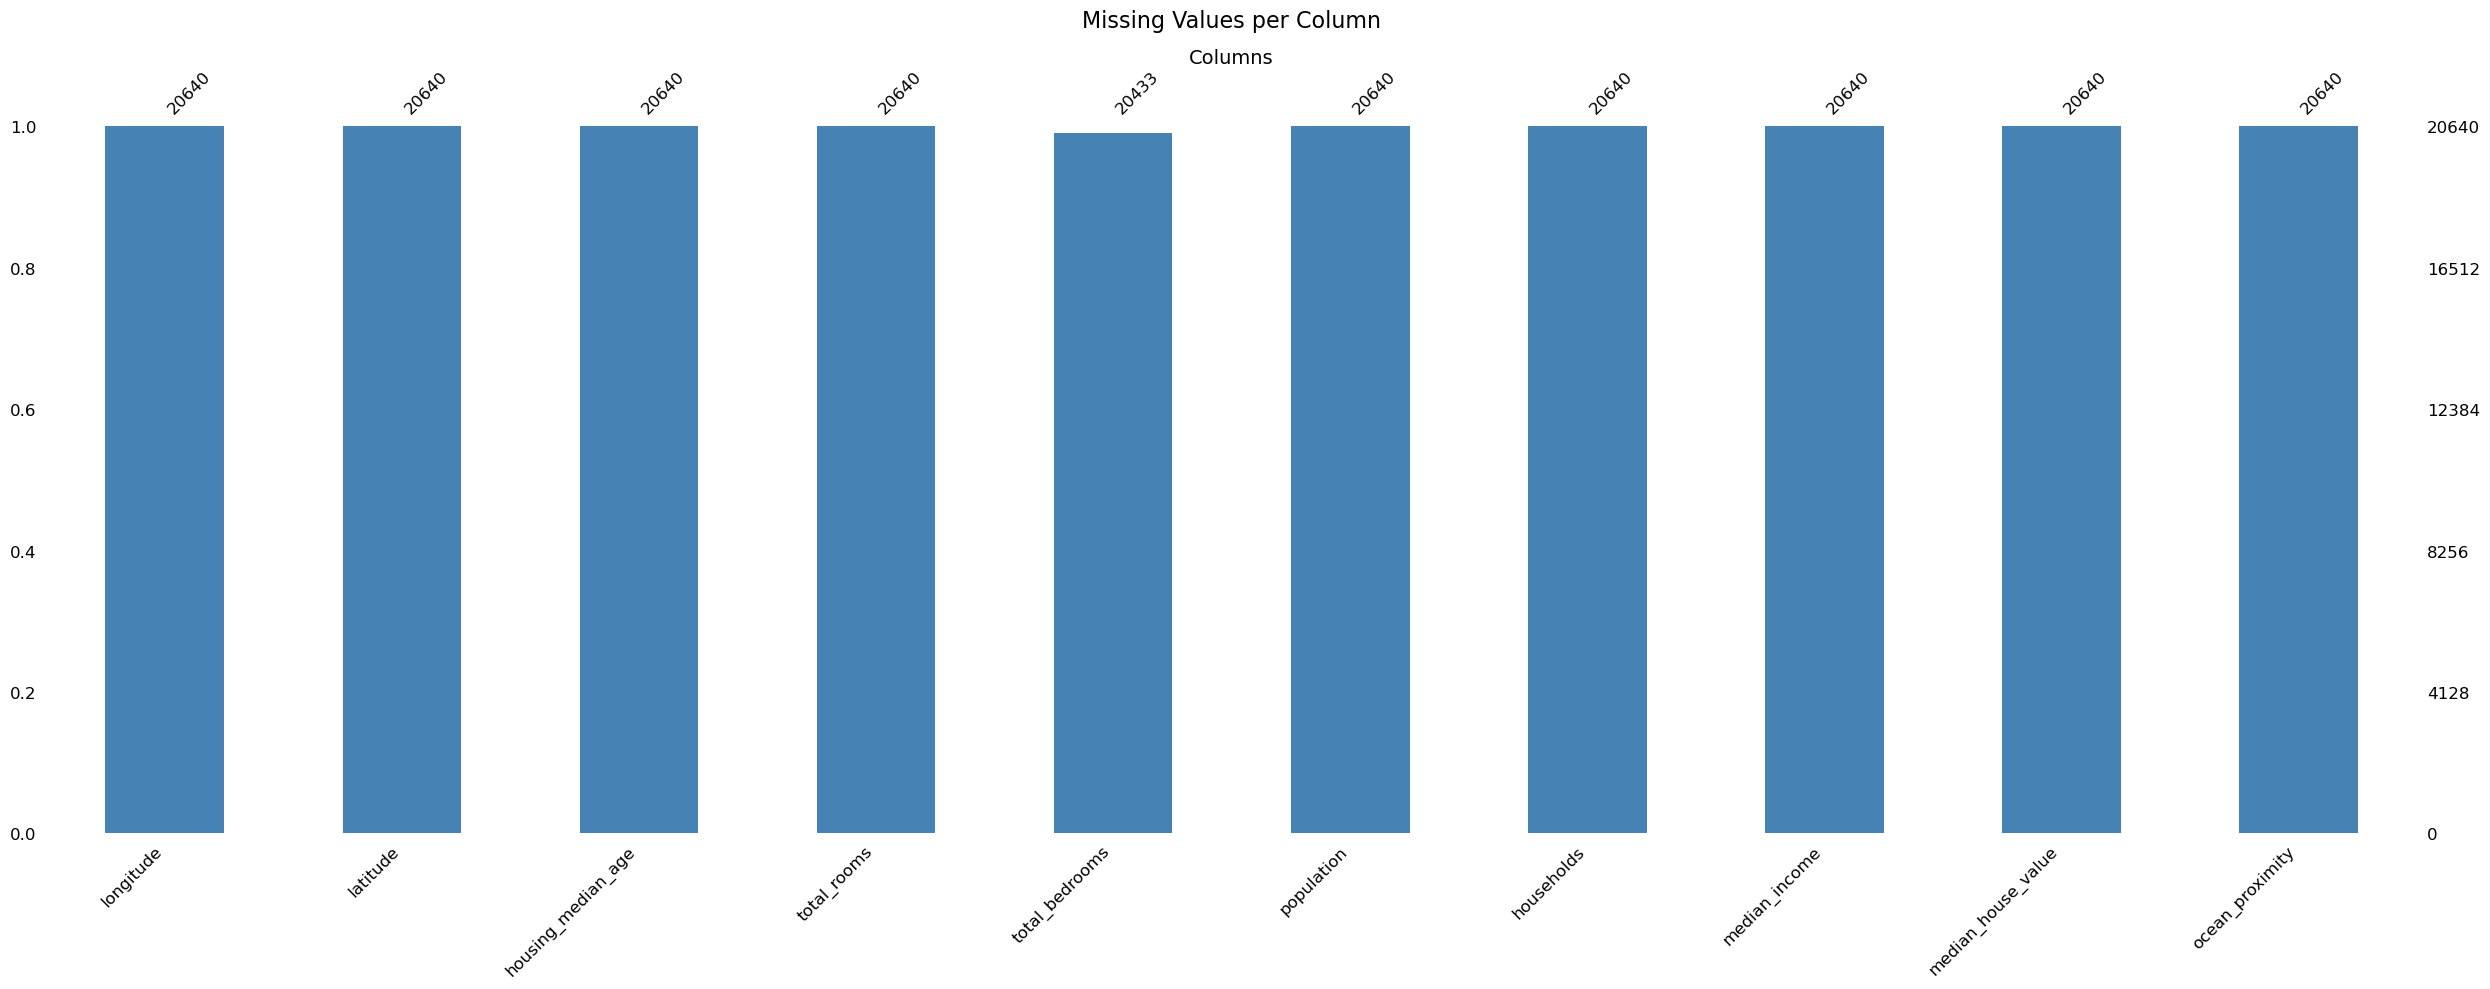

In [42]:
# Bar chart of missing values
plt.figure(figsize=(10, 6))  # control the visual size
mno.bar(df, color='steelblue', fontsize=12)

plt.title("Missing Values per Column", fontsize=16, pad=15)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Count of Missing Values", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# Missing data in the total_bedrooms column replaced with the column's median instead of dropping those rows
# df.isnull().sum() used again to confirm missing values have been replaced with column's median
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [111]:
# Check for duplicate entries
print("Duplicate Rows: ")
print(df.duplicated().sum())

Duplicate Rows: 
0


In [113]:
# Data shuffling
df_shuffled = df.sample(n=len(df), random_state=42)
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [117]:
# One-Hot Encoding 
df_encoded = pd.concat((df_shuffled.drop("ocean_proximity", axis=1), 
                       pd.get_dummies(df_shuffled["ocean_proximity"], dtype=int)), 
                       axis=1)

df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,0,1,0,0,0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,0,1,0,0,0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,0,0,0,1,0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,1,0,0,0,0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,0,0,0,0,1


In [123]:
# Moved the Target variable to the last column
df_encoded = df_encoded[['longitude', 'latitude',	
                         'housing_median_age',	'total_rooms',	
                         'total_bedrooms',	'population',	
                         'households',	'median_income',	
                         '<1H OCEAN',	'INLAND',	'ISLAND',
                         'NEAR BAY', 'NEAR OCEAN', 'median_house_value']]
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,0,1,0,0,0,47700.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,0,1,0,0,0,45800.0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,0,0,0,1,0,500001.0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,1,0,0,0,0,218600.0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,0,0,0,0,1,278000.0


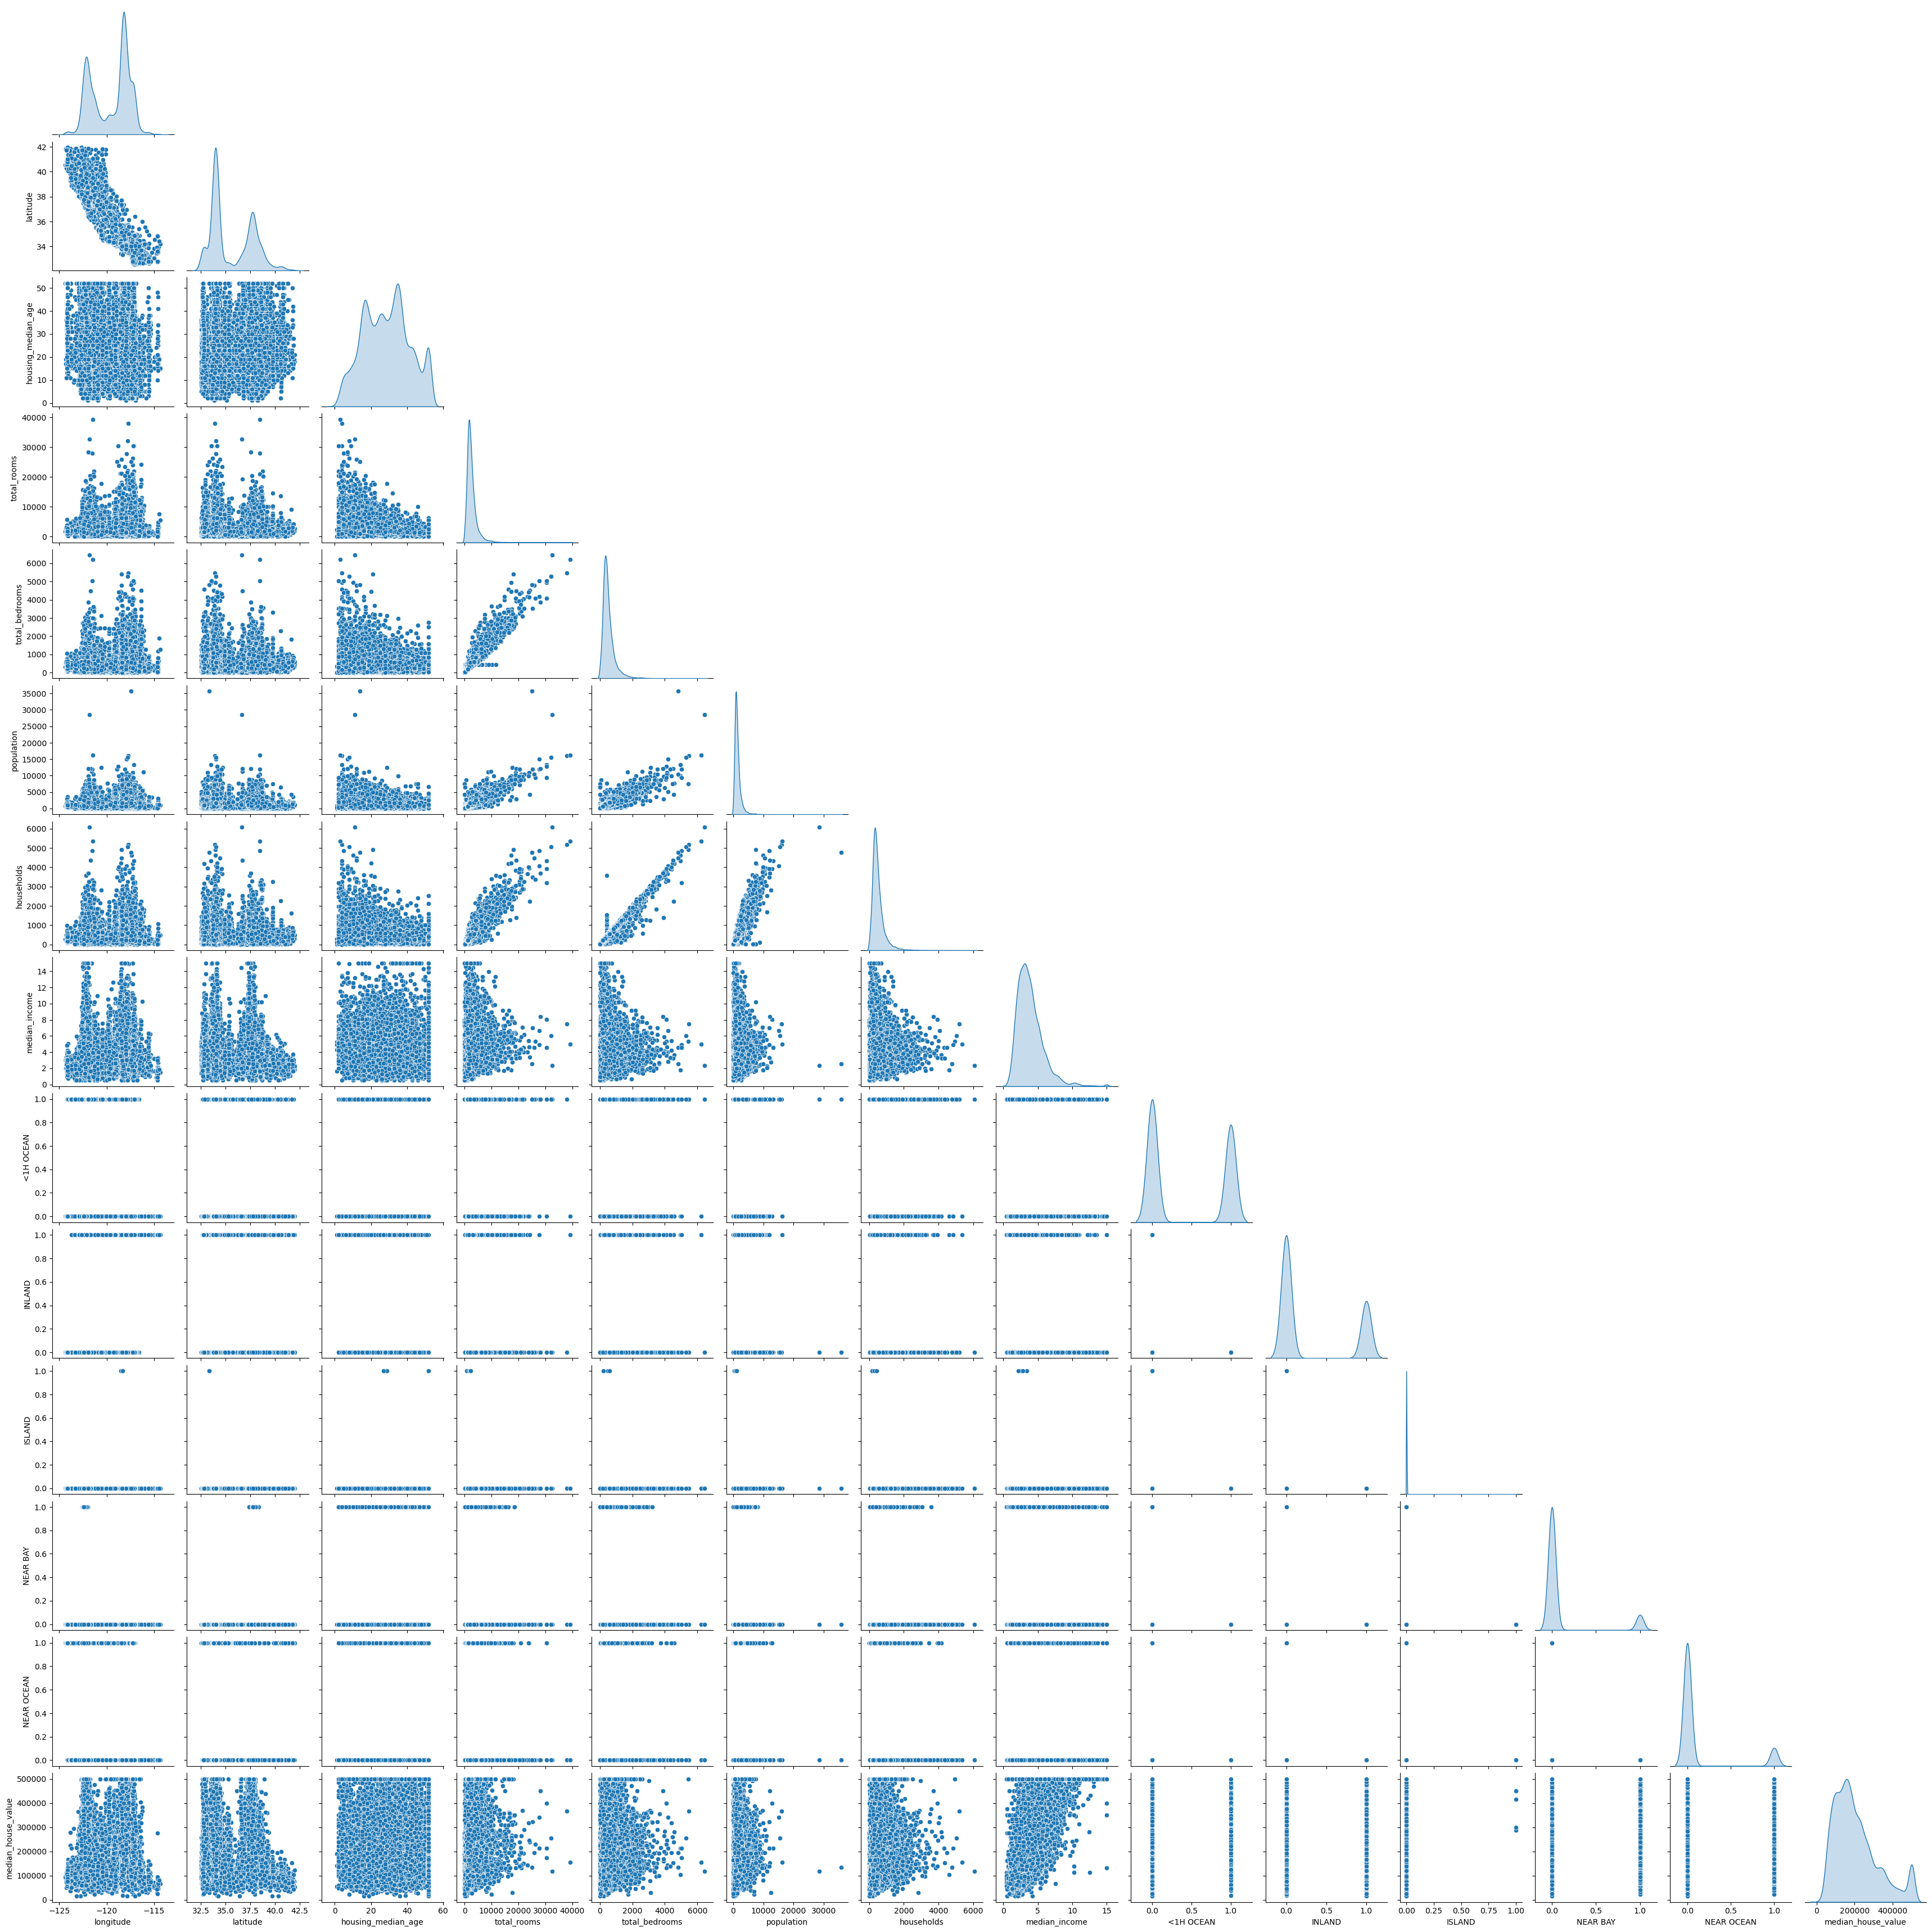

In [145]:
# Pair Plot to visualize Correlation
df_encoded = df_encoded.loc[:, :]
sns.pairplot(df_encoded[['longitude', 'latitude',	
                         'housing_median_age',	'total_rooms',	
                         'total_bedrooms',	'population',	
                         'households',	'median_income',	
                         '<1H OCEAN',	'INLAND',	'ISLAND',
                         'NEAR BAY', 'NEAR OCEAN', 'median_house_value']], diag_kind="kde", corner=True)
plt.show()

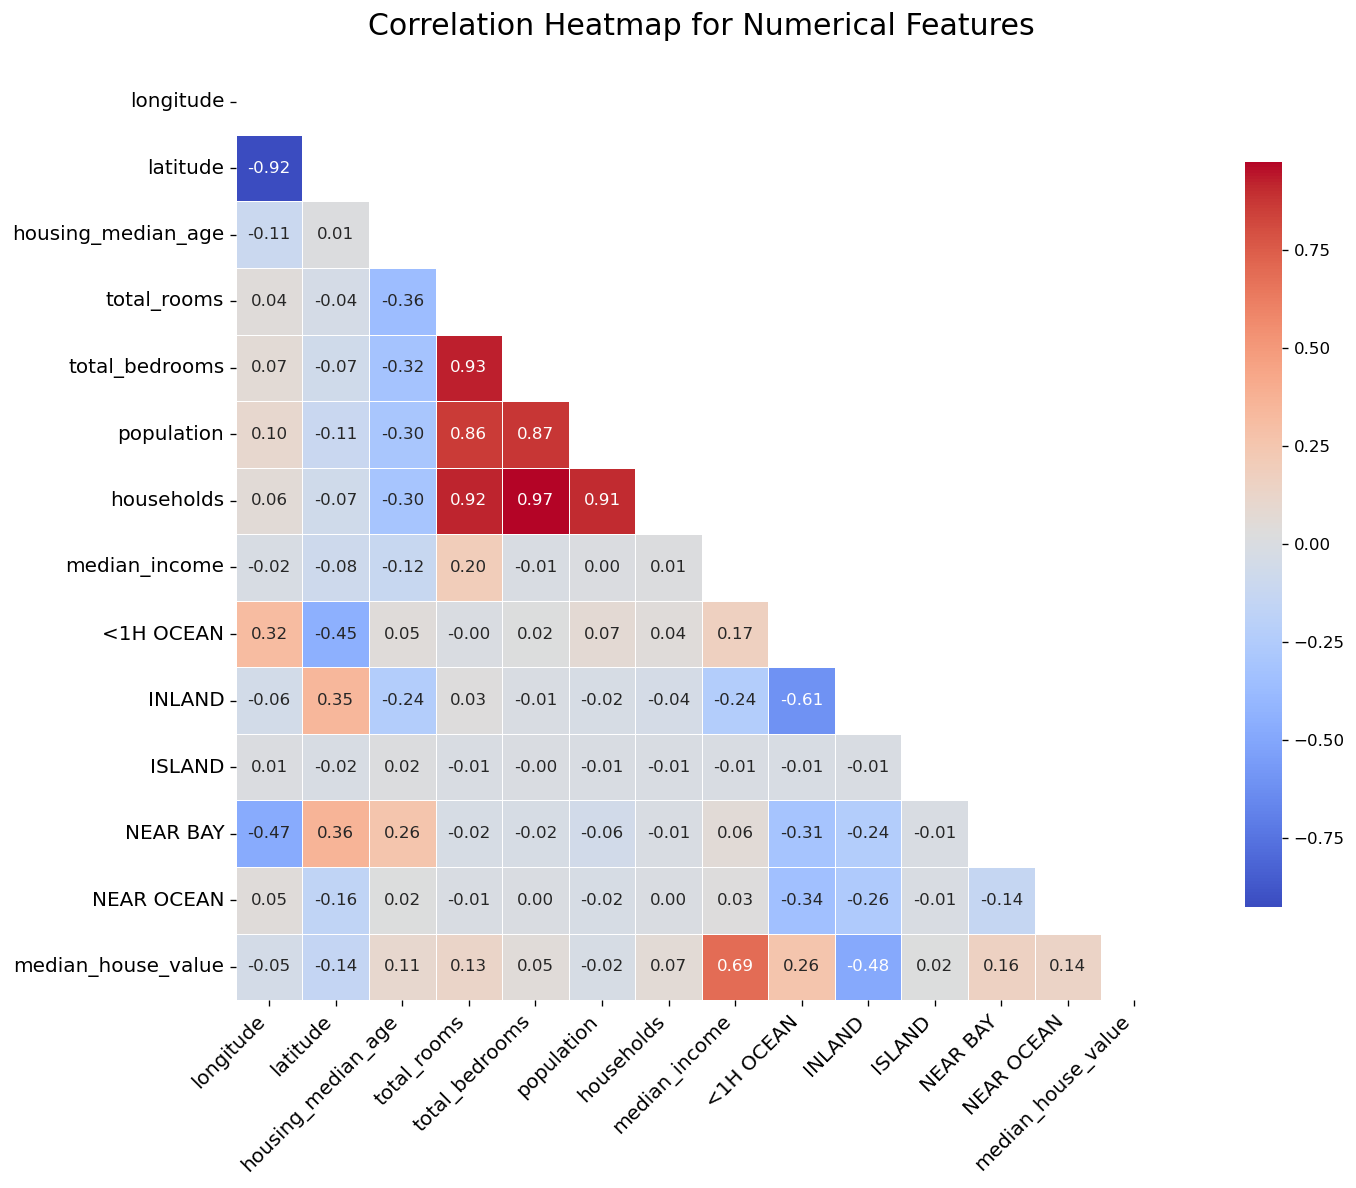

In [133]:
# Visualization of Correlation Matrix
corr = df_encoded.corr(numeric_only=True)

# --- Plot ---
plt.figure(figsize=(14, 10), dpi=120)  # clearer and higher resolution

# Mask the upper triangle for cleaner visualization
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",        # diverging palette
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.title("Correlation Heatmap for Numerical Features", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [151]:
# This was jettisoned because some columns have lots of outliers that if removed will drastically reduce our data size.

def find_outliers(df, multiplier=1.5):
    
    outliers_dict = {}
    
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        
        outliers_dict[col] = outlier_indices
        
        # Print outliers
        print(f"\nColumn: {col}")
        print(f"Lower bound: {lower_bound:.3f}, Upper bound: {upper_bound:.3f}")
        
        if outlier_indices:
            print(f"Outlier indices: {outlier_indices}")
            print(df.loc[outlier_indices, col])
        else:
            print("No outliers found.")
    
    return outliers_dict

In [153]:
df = df_encoded
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,0,1,0,0,0,47700.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,0,1,0,0,0,45800.0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,0,0,0,1,0,500001.0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,1,0,0,0,0,218600.0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,0,0,0,0,1,278000.0


## Model Implementation and Training

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data splitting
X = df.drop(columns='median_house_value')
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

In [178]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_evaluation(y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    return mae,rmse,r2

In [189]:
models = {
    "RandomForest Regression": RandomForestRegressor(),
    "XGBoost Regression": XGBRegressor(objective="reg:squarederror")
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation
    train_mae, train_rmse, train_r2 = model_evaluation(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = model_evaluation(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train MAE": train_mae,
        "Train RMSE": train_rmse,
        "Train R²": train_r2,
        "Test MAE": test_mae,
        "Test RMSE": test_rmse,
        "Test R²": test_r2
    })

results_df = pd.DataFrame(results)
results_df

,Model,Train MAE,Train RMSE,Train R²,Test MAE,Test RMSE,Test R²
0,RandomForest Regression,11767.266965,18234.567703,0.974993,30544.944792,46950.879825,0.835393
1,XGBoost Regression,20010.760080,28450.426002,0.939124,30582.585458,46398.125604,0.839246


## Tunning

In [191]:
# Random Forest Tunning

from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rf_params,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
best_rf

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\pmcan\anaconda3\Mmadueke\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pmcan\anaconda3\Mmadueke\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pmcan\anaconda3\Mmadueke\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pmcan\anaconda3\Mmadueke\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\

RandomForestRegressor(max_depth=20, max_features='log2')

In [193]:
# XGB Tunning
xgb_params = {
    "n_estimators": [200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

xgb_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror"),
    param_distributions=xgb_params,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
best_xgb


Fitting 3 folds for each of 20 candidates, totalling 60 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [196]:
# Evaluate Tuned Models
def evaluate_best_model(model, name):
    y_pred = model.predict(X_test)
    mae, rmse, r2 = model_evaluation(y_test, y_pred)

    print(f"\n{name} (Tuned) Performance:")
    print(f"Test MAE : {mae:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R²  : {r2:.4f}")

evaluate_best_model(best_rf, "Random Forest")
evaluate_best_model(best_xgb, "XGBoost")


Random Forest (Tuned) Performance:
Test MAE : 32353.1821
Test RMSE: 48021.0903
Test R²  : 0.8278

XGBoost (Tuned) Performance:
Test MAE : 28219.0467
Test RMSE: 43790.2181
Test R²  : 0.8568


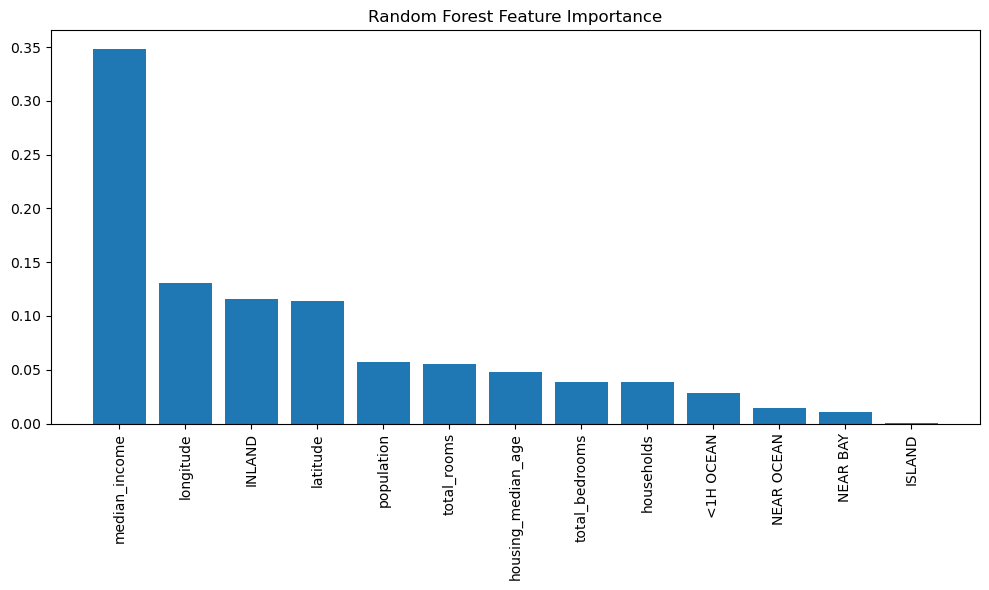

In [198]:
rf_importances = best_rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), rf_importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

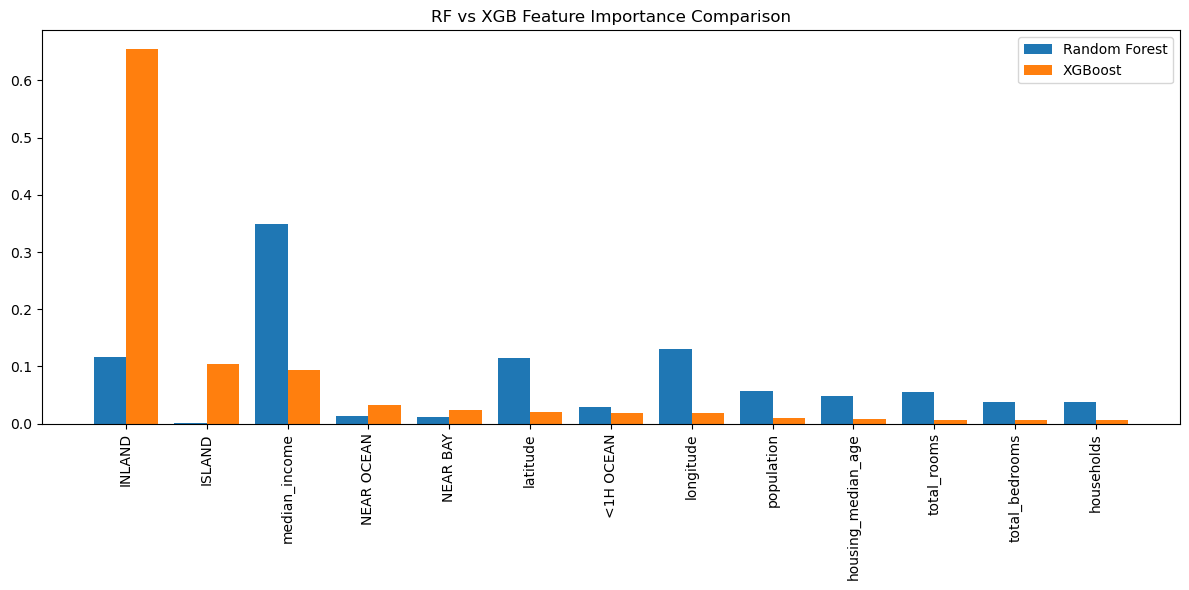

In [216]:
plt.figure(figsize=(12,6))

plt.bar(np.arange(len(indices)) - 0.2, rf_importances[indices], 
        width=0.4, label="Random Forest")

plt.bar(np.arange(len(indices)) + 0.2, xgb_importances[indices], 
        width=0.4, label="XGBoost")

plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.title("RF vs XGB Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

In [202]:
# Select best Model

if results_df['Test RMSE'].min() == results_df.loc[results_df['Test RMSE'].idxmin(), 'Test RMSE']:
    best_model = results_df.loc[results_df['Test RMSE'].idxmin(), 'Model']
best_model

'XGBoost Regression'

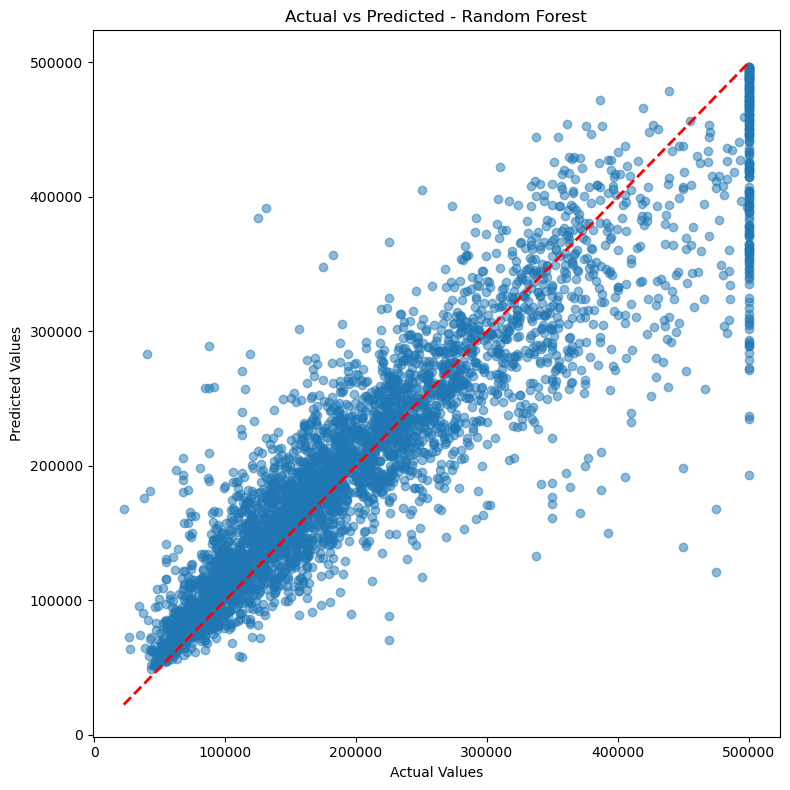

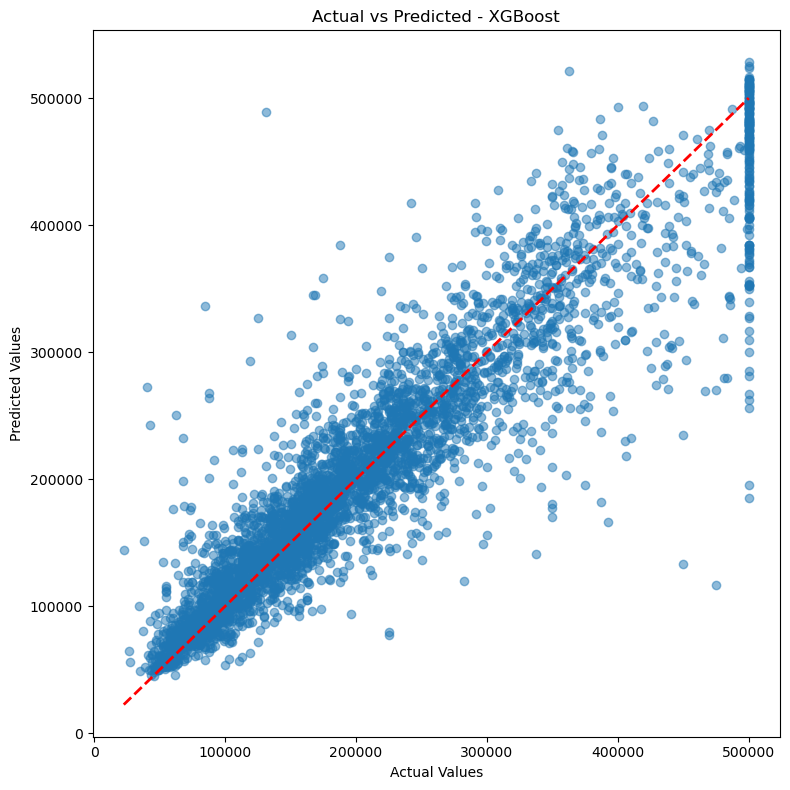

In [218]:
# Actual Values Vs predicted values

def plot_actual_vs_predicted(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(8,8))
    plt.scatter(y_true, y_pred, alpha=0.5, color='tab:blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
             'r--', lw=2)  # diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.tight_layout()
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test, best_rf.predict(X_test), model_name="Random Forest")
plot_actual_vs_predicted(y_test, best_xgb.predict(X_test), model_name="XGBoost")

Goal: The objective was to develop a supervised regression model capable of accurately predicting the median house value in California districts, leveraging the publicly available Kaggle housing dataset.

1. Data Cleaning and Imputation An initial Exploratory Data Analysis (EDA) was performed to understand feature distributions and data quality. The key 
cleaning steps included:
Missing Value Handling: The total_bedrooms column contained 207 missing values, which were imputed using the column's median to maintain central tendency while minimally distorting the distribution.

2Data Integrity: Duplicates were checked and removed, and the dataset was shuffled to ensure the subsequent train/test split would be fully randomized and representative.

Outlier Strategy: Outliers were identified across several features. However, a decision was made to retain these samples, as their removal would have drastically reduced the total sample size. The use of tree-based models (Random Forest, XGBoost) was adopted, given their inherent robustness to outliers.

2. Feature Encoding: The categorical variable ocean_proximity was converted into a numerical format using One-Hot Encoding, expanding the feature space from 9 to 14 total columns for the subsequent modeling stage.
                                                                                                                                                                    
3. Baseline Model Development: The prepared data was split into training and testing sets and Standization using StandardScaler. Random Forest and XGBoost were selected as the primary models based on their established superior performance in housing price prediction. A hyperparameter tuning search was executed, and the models were trained. The final results were evaluated and compared against each other.

The XGBoost outperformed better Random Forest: 
Random Forest (Tuned) Performance: Test MAE : 32353.1821 Test RMSE: 48021.0903 Test R² : 0.8278
XGBoost (Tuned) Performance: Test MAE : 28219.0467 Test RMSE: 43790.2181 Test R² : 0.8568